# Exam 1- Higgs ML Challenge

The HiggsML challenge was organized by ATLAS colleagues and ran on Kaggle's platform. The challenge provided a training and test set of Higgs and background events in CSV format. Using this data, participants were tasked with creating a classifier, which they submitted to Kaggle. Kaggle evaluated the classifier against another test set. At the end of the competition, the best performing classifiers were awarded a cash prize.

We will run a mini-competition, using the same data, as your first exam. Note that you will not need a Kaggle account, but may wish to get one to get more details.

The challenge is described in https://higgsml.lal.in2p3.fr

The Kaggle site is https://www.kaggle.com/c/higgs-boson

Detail description of the data and challenge: https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf

You are welcome to use Scikit or any other package you like.

Please separate different steps into different Jupyter Notebooks. For example:

    - Convert CSV to h5 format.
    - Load data and plot/compare variables.
    - Setup and Train the Classifier. Save the trained classifier (see http://scikit-learn.org/stable/modules/model_persistence.html )
    - Evaluate and compare different classifiers using ROC curves and metric defined by competition.

A copy of the data CSV files are on the cluster at: /data/afarbin/DLClass/HiggsML


In [3]:
!ls /data/afarbin/DLClass/HiggsML

Exam 1.ipynb  test.csv	training.csv


Note that the first line of the file contains the variable names:

In [4]:
!head -2 /data/afarbin/DLClass/HiggsML/training.csv

!head -2 /data/afarbin/DLClass/HiggsML/test.csv

EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
100000,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.00265331133733,s
EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_

Some basic shell commands may help you. For example here is the number of lines (so N Events + variable names):

In [89]:
!wc -l /data/afarbin/DLClass/HiggsML/training.csv

!wc -l /data/afarbin/DLClass/HiggsML/test.csv

250001 /data/afarbin/DLClass/HiggsML/training.csv
550001 /data/afarbin/DLClass/HiggsML/test.csv


You can strip off the first line into a new file in your Exam directory:

In [91]:
!tail -25000 /data/afarbin/DLClass/HiggsML/training.csv > mytraining.csv

In [92]:
!tail -55000 /data/afarbin/DLClass/HiggsML/test.csv > test.csv

In [26]:
!head -2 mytraining.csv


325000,-999.0,83.863,89.323,14.852,-999.0,-999.0,-999.0,2.193,14.852,92.155,0.642,-1.402,-999.0,56.112,-0.751,-2.935,36.043,-1.829,-1.027,68.9,0.973,171.752,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,4.33475402901,b
325001,-999.0,94.737,39.619,29.276,-999.0,-999.0,-999.0,1.609,29.276,55.051,1.658,-1.204,-999.0,20.712,0.027,-0.695,34.339,-0.548,-2.198,66.207,1.173,125.794,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,4.75719501339,b


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
names = "EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label"
VarNames = names.split(",")

print VarNames

['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'Weight', 'Label']


In [3]:
import pandas as pd
filename = "mytraining.csv"
df = pd.read_csv(filename, names=VarNames)

In [4]:
df

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,325000,-999.000,83.863,89.323,14.852,-999.000,-999.000,-999.000,2.193,14.852,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,4.334754,b
1,325001,-999.000,94.737,39.619,29.276,-999.000,-999.000,-999.000,1.609,29.276,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,4.757195,b
2,325002,81.103,2.098,50.311,100.200,0.975,136.149,0.609,1.652,29.865,...,3,74.630,1.408,0.007,62.509,0.433,-1.986,184.927,0.064061,b
3,325003,59.615,70.272,47.524,124.623,-999.000,-999.000,-999.000,0.935,4.825,...,1,129.350,2.504,-2.587,-999.000,-999.000,-999.000,129.350,2.356486,b
4,325004,215.394,32.584,153.179,67.003,2.034,163.624,-0.792,3.745,25.024,...,2,57.384,1.510,1.226,50.355,-0.524,-2.716,107.739,2.956064,b
5,325005,83.436,35.536,59.594,49.834,0.275,270.931,0.257,2.244,57.698,...,3,143.132,0.662,-0.717,127.067,0.388,2.098,330.859,0.744056,b
6,325006,142.025,48.356,99.293,69.362,0.535,33.569,0.866,2.445,32.161,...,2,48.918,0.701,1.801,32.444,1.236,1.238,81.362,0.001503,s
7,325007,77.226,84.147,67.166,34.288,-999.000,-999.000,-999.000,2.150,2.994,...,1,36.211,-0.869,-0.786,-999.000,-999.000,-999.000,36.211,1.786843,b
8,325008,105.349,28.849,77.693,113.563,1.030,101.585,-0.263,1.428,29.314,...,2,86.010,0.473,-1.170,37.540,-0.556,0.369,123.551,1.373391,b
9,325009,108.877,1.394,74.439,3.598,-999.000,-999.000,-999.000,3.116,3.598,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0.018636,s


In [78]:
#remove instances with -999
#removed too much of data so i ended up not using it
df1 = df[df.DER_mass_MMC != -999.000]
df1 = df[df.DER_deltaeta_jet_jet != -999.000]
df1 = df[df.DER_mass_jet_jet != -999.000]
df1 = df[df.DER_prodeta_jet_jet != -999.000]
df1 = df[df.PRI_jet_leading_pt != -999.000]
df1 = df[df.PRI_jet_leading_eta != -999.000]
df1 = df[df.PRI_jet_leading_phi != -999.000]
df1 = df[df.PRI_jet_subleading_pt != -999.000]
df1 = df[df.PRI_jet_subleading_eta != -999.000]
df1 = df[df.PRI_jet_subleading_phi != -999.000]


In [59]:
#separate into signal and background

df_sig=df[df.Label=='s']
df_bkg=df[df.Label=='b']

df_clean_sig=df1[df1.Label=='s']
df_clean_bkg=df1[df1.Label=='b']


EventId


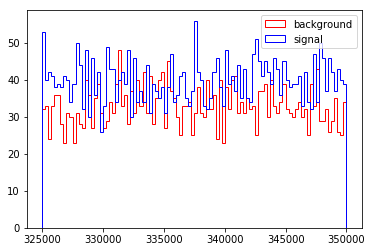

DER_mass_MMC


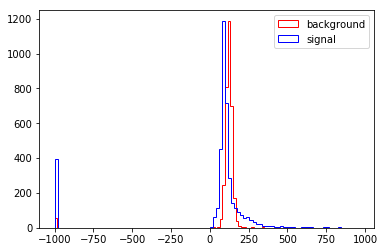

DER_mass_transverse_met_lep


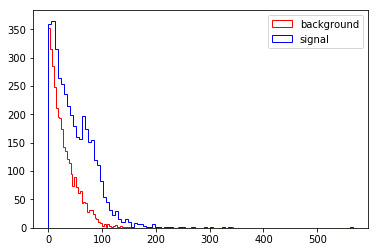

DER_mass_vis


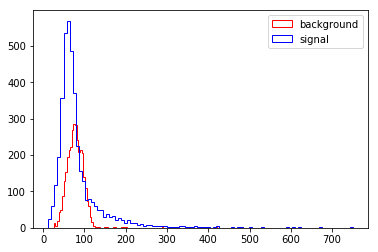

DER_pt_h


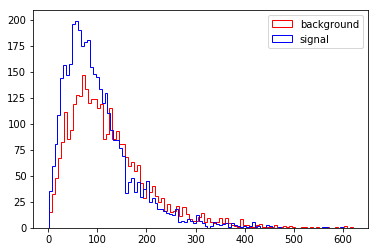

DER_deltaeta_jet_jet


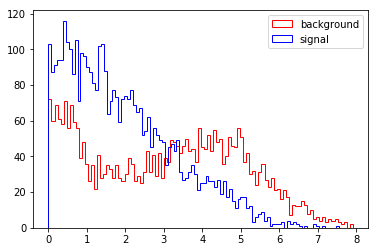

DER_mass_jet_jet


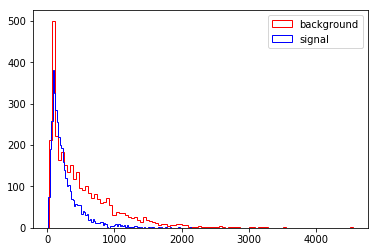

DER_prodeta_jet_jet


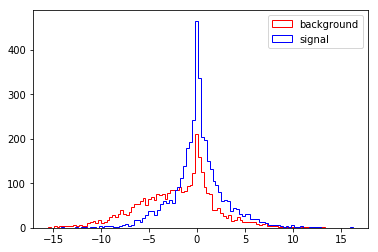

DER_deltar_tau_lep


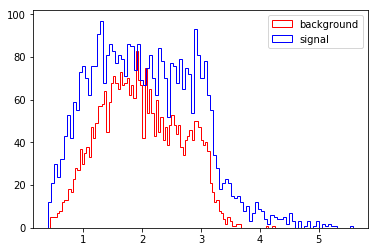

DER_pt_tot


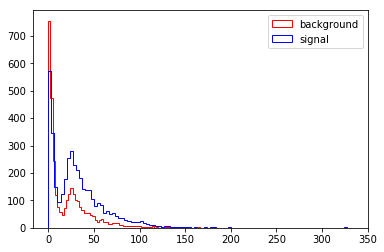

DER_sum_pt


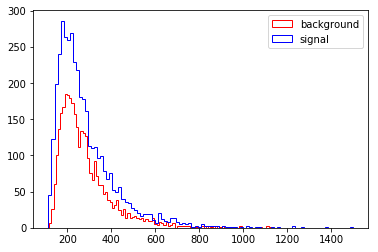

DER_pt_ratio_lep_tau


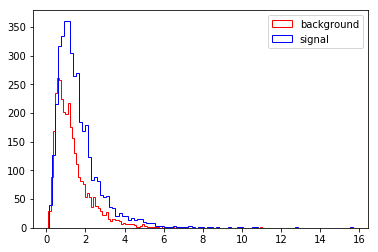

DER_met_phi_centrality


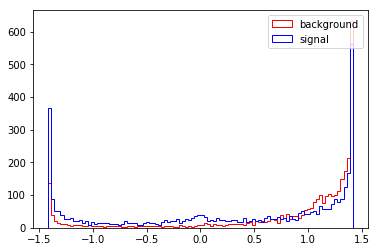

DER_lep_eta_centrality


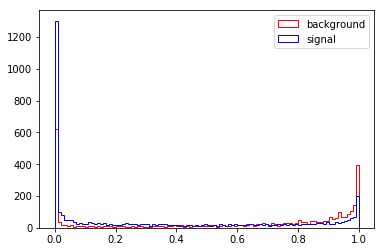

PRI_tau_pt


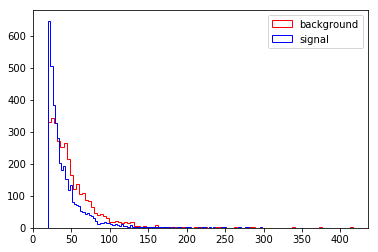

PRI_tau_eta


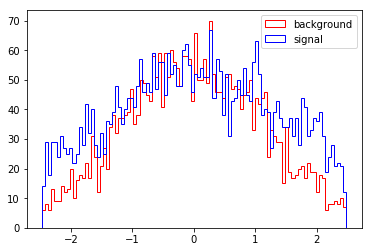

PRI_tau_phi


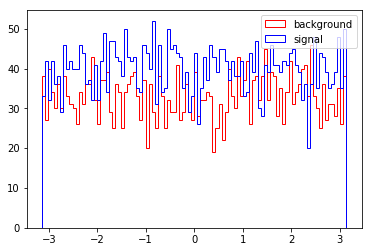

PRI_lep_pt


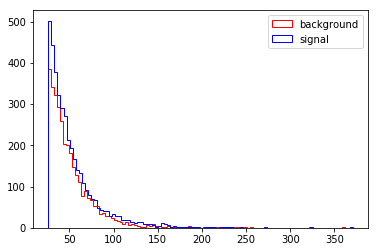

PRI_lep_eta


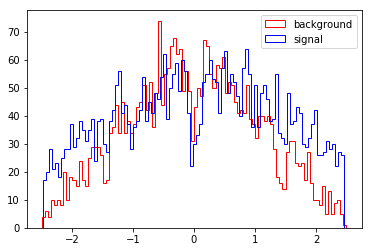

PRI_lep_phi


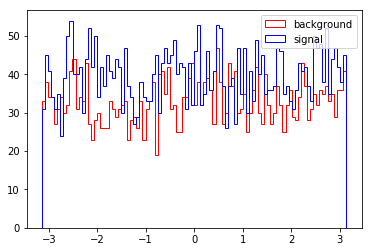

PRI_met


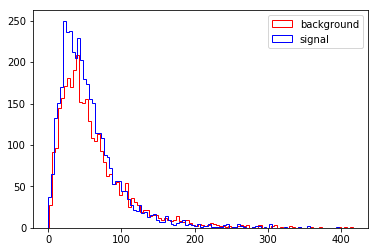

PRI_met_phi


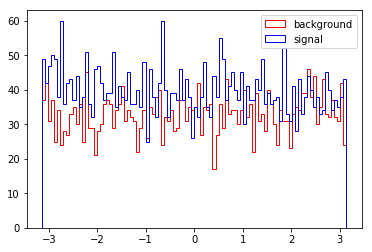

PRI_met_sumet


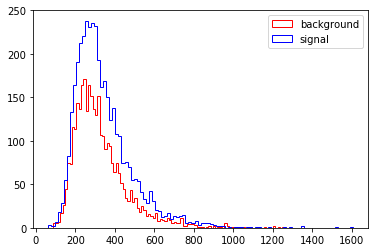

PRI_jet_num


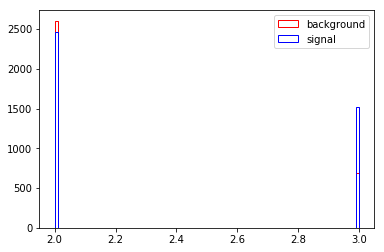

PRI_jet_leading_pt


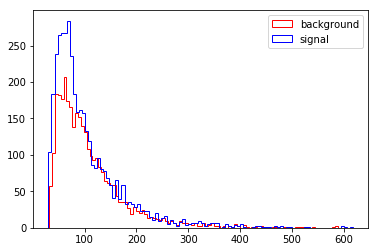

PRI_jet_leading_eta


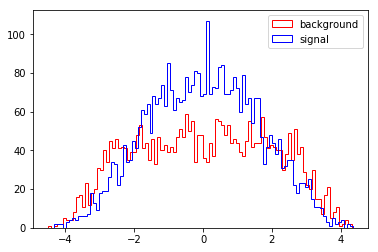

PRI_jet_leading_phi


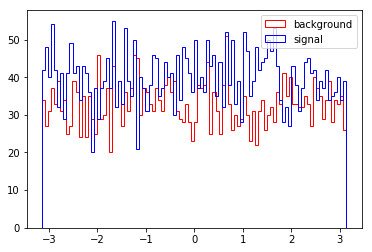

PRI_jet_subleading_pt


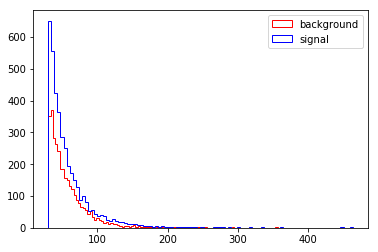

PRI_jet_subleading_eta


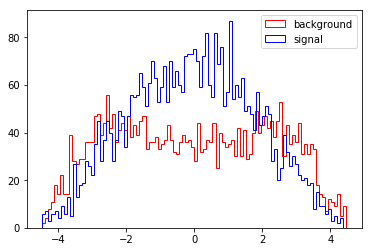

PRI_jet_subleading_phi


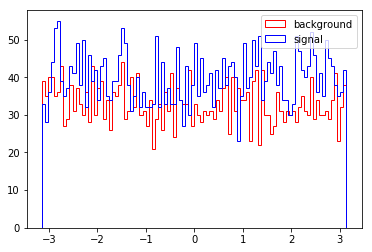

PRI_jet_all_pt


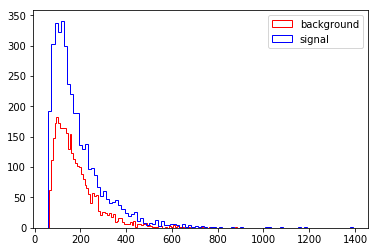

Weight


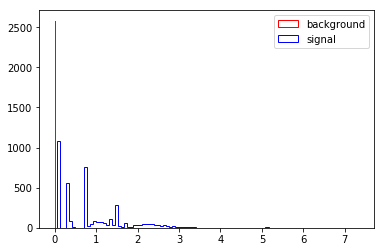

In [60]:
for var in VarNames[:-1]:
    print var
    plt.figure()
    plt.hist(df_sig[var],bins=100,histtype="step", color="red",label="background",stacked=True)
    plt.hist(df_bkg[var],bins=100,histtype="step", color="blue", label="signal",stacked=True)
    plt.legend(loc='upper right')
    plt.show()

In [73]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

#mytrainingdata
N_Train=25000

Train_Sample=df[:N_Train]

X_Train=Train_Sample[VarNames[:-2]]
y_Train=Train_Sample["Label"]


Test_Sample=df[:N_Train]

X_Test=Test_Sample[VarNames[:-2]]
y_Test=Test_Sample["Label"]
#new list for s and b to 0 and 1
intsignal = [0 if x == 'b' else 1 for x in y_Test]


Test_sig=Test_Sample[Test_Sample.Label=='s']
Test_bkg=Test_Sample[Test_Sample.Label=='b']

#create list with weight for signal and background
weight_sig = Test_sig["Weight"]
weight_bkg = Test_bkg["Weight"]
weight_sig1 = weight_sig
weight_sig1 = weight_sig.tolist()
weight_bkg1 = weight_bkg
weight_bkg1 = weight_bkg.tolist()




In [74]:
Fisher.fit(X_Train, intsignal)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

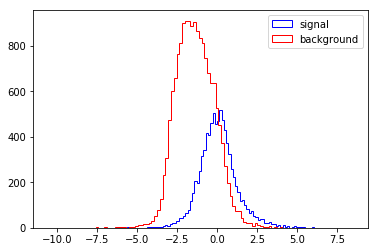

In [81]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[:-2]]), bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[:-2]]), bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

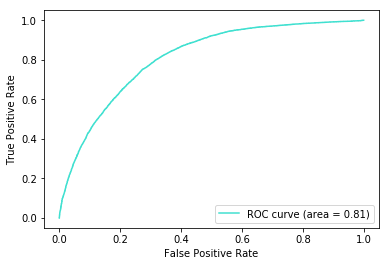

In [82]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(intsignal, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='turquoise',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

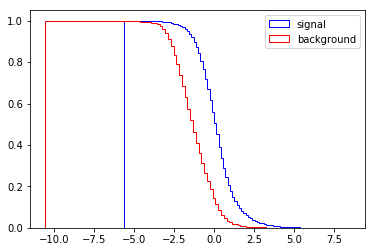

100


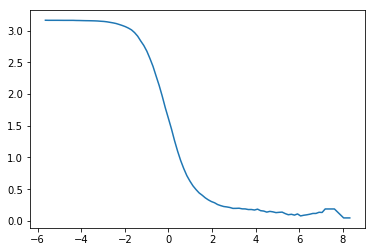

Max significance at  -5.64380819202  of 3.16227097545


(-5.6438081920245251, 3.1622709754456628, 0)

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import math
def PlotSignificance(N_S,N_B, N_S_min=1):
    plt.figure()
    tpr_sig,bins_sig,p_sig=plt.hist(Fisher.decision_function(Test_sig[VarNames[:-2]]),bins=100,histtype="step", color="blue", label="signal",cumulative=-1,stacked=True,normed=True)
    fpr_bkg,bins_bkg,p_bkg=plt.hist(Fisher.decision_function(Test_bkg[VarNames[:-2]]),bins=100,histtype="step", color="red", label="background",cumulative=-1,stacked=True,normed=True)
    plt.legend(loc='upper right')
    plt.show()
    
    good_bins = np.where(tpr_sig*N_S>=N_S_min)

    print len(good_bins[0])
    if len(good_bins[0])<1:
        print "Insufficient Signal."
        return 0,0,0
    
    s = N_S*tpr_sig
    b = N_B*fpr_bkg
    
    AMS = np.sqrt(2*((s+b+10)*np.log(1.0 +s/(b+10))-s))

    plt.figure()
    plt.plot(bins_sig[:-1],AMS)
    
    max_sign=np.max(AMS[good_bins])
    max_signI=np.argmax(AMS[good_bins])
    
    plt.show()

    print "Max significance at ", bins_sig[max_signI], " of", max_sign
    return bins_sig[max_signI],max_sign, max_signI
    
PlotSignificance(1000000,1e11)

